In [587]:
from lda import guidedlda as glda
import numpy as np

**Importing Clean Corpus**

In [588]:
import joblib
clean_corpus=joblib.load(r"C:\Users\LENOVO\Desktop\cs_concept.job")

In [589]:
import joblib
whole_corpus=joblib.load(r"C:\Users\LENOVO\Desktop\cs_concept_noisy.job")

In [590]:
import pandas as pd
labeled_corpus=pd.read_csv(r"C:\Users\LENOVO\Desktop\cs_gs.csv")
freq=labeled_corpus['freq']
terms=labeled_corpus['term']

In [591]:
import gensim
from gensim import corpora
dictionary=whole_corpus['dict']
docs=whole_corpus['docs']
doc_term_matrix = [dictionary.doc2bow(rev) for rev in docs]

**Creating Document Dictionary and Document-Term Matrix**

In [592]:
id2word = [[i,dictionary[i]] for i in range(len(dictionary))]
print(id2word)

[[0, 'analysis'], [1, 'artificial'], [2, 'artificial_bee_colony'], [3, 'color_information'], [4, 'cross_validation'], [5, 'explaining'], [6, 'handle'], [7, 'increase'], [8, 'linear_discriminant'], [9, 'method'], [10, 'neural_networks'], [11, 'novel'], [12, 'objective'], [13, 'principal_component'], [14, 'proposed_method'], [15, 'recall_rate'], [16, 'repetition'], [17, 'result'], [18, 'state-of-the-art'], [19, 'support_vector_machines'], [20, 'total'], [21, 'vector_machine'], [22, 'vision'], [23, 'accident'], [24, 'clinical_data'], [25, 'graphic'], [26, 'healthy_subjects'], [27, 'movement'], [28, 'present_study'], [29, 'purpose'], [30, 'quantify'], [31, 'smoothness'], [32, 'subject'], [33, 'subjects'], [34, 'viewing'], [35, 'virtual'], [36, 'amounts'], [37, 'assists'], [38, 'data_entry'], [39, 'example'], [40, 'export'], [41, 'extraction'], [42, 'implement'], [43, 'input'], [44, 'limitation'], [45, 'link'], [46, 'management_system'], [47, 'moving'], [48, 'occupancy'], [49, 'operating'],

In [593]:
dtm=[]
for i in range(len(docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  dtm.append(doc_counts)

In [594]:
dtm=np.array(dtm)
print(dtm.shape)
print(dtm.sum())

(5746, 8261)
102103


In [595]:
print(len(dictionary))
print(len(docs))

8261
5746


**Computing TF-IDF of Core Concepts**

In [596]:
terms_list=[]
for term in terms:
    terms_list.append(term)

In [598]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))
print(vocab)

('analysis', 'artificial', 'artificial_bee_colony', 'color_information', 'cross_validation', 'explaining', 'handle', 'increase', 'linear_discriminant', 'method', 'neural_networks', 'novel', 'objective', 'principal_component', 'proposed_method', 'recall_rate', 'repetition', 'result', 'state-of-the-art', 'support_vector_machines', 'total', 'vector_machine', 'vision', 'accident', 'clinical_data', 'graphic', 'healthy_subjects', 'movement', 'present_study', 'purpose', 'quantify', 'smoothness', 'subject', 'subjects', 'viewing', 'virtual', 'amounts', 'assists', 'data_entry', 'example', 'export', 'extraction', 'implement', 'input', 'limitation', 'link', 'management_system', 'moving', 'occupancy', 'operating', 'outside', 'package', 'practitioner', 'processing', 'record', 'researcher', 'spatial', 'spatial_distribution', 'tags', 'toolbox', '2016', 'catchment', 'characteristic', 'conservation', 'copyright', 'cross', 'discover', 'entropy', 'geology', 'groundwater', 'guide', 'heterogeneous_environme

In [599]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
#compute TFIDF of terms
tfidf=[]
for i in range(len(dictionary)):
    tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i]))
print(tfidf)

[0.9290144335182324, 0.8266044922097722, 1.391114877133519, 0.6955574385667594, 0.9484874162273993, 0.8025662752693379, 0.7480523395906659, 0.8057447555674342, 0.9563914780292943, 1.0582751062729647, 1.035607741866064, 0.7083199603753239, 0.6955574385667594, 0.8641774236738526, 0.8763598308547551, 0.9274099180890126, 0.8942881353001193, 0.8369199212269294, 0.772582255589253, 0.8536386746046594, 0.7459601515063797, 0.8971682903252405, 0.8239321336042487, 0.8694467982084494, 0.8346689262801114, 0.7760351587315085, 1.1592623976112657, 0.8578541742323367, 0.7949227869334394, 0.7190031949229424, 0.7809767731275896, 1.0930188320334793, 0.8832475410371549, 0.6955574385667594, 0.7490618569180486, 0.7651131824234354, 0.711733192952033, 0.6955574385667594, 1.391114877133519, 0.7469895026861325, 0.6955574385667594, 0.9251589231421946, 0.7486534262436113, 0.934655308074083, 0.7495231019038356, 0.8316447635037342, 0.9677320884407088, 0.881039422184562, 1.8084493402735746, 0.9301537344147197, 0.7271

In [600]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [601]:
#determining term counts of core concepts
core_concepts=['data_structures','cryptography','software_engineering','computer_graphics','network_security','computer_programming','algorithm_design','operating_systems','distributed_computing','machine_learning']
core_concepts_counts={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_counts[core_concept]=word_counts[index]
print(core_concepts_counts)

{'data_structures': 223, 'cryptography': 727, 'software_engineering': 546, 'computer_graphics': 141, 'network_security': 354, 'computer_programming': 259, 'algorithm_design': 237, 'operating_systems': 158, 'distributed_computing': 258, 'machine_learning': 291}


In [602]:
#determining TF-IDF of core concepts
core_concepts_tfidf={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_tfidf[core_concept]=tfidf[index]
print(core_concepts_tfidf)

{'data_structures': 0.9017983069789963, 'cryptography': 2.5538901911011824, 'software_engineering': 2.098200892030114, 'computer_graphics': 1.886030746882944, 'network_security': 2.1984583326127933, 'computer_programming': 1.7322055441229876, 'algorithm_design': 1.7725496015088387, 'operating_systems': 0.7906336352053813, 'distributed_computing': 2.5275185795806188, 'machine_learning': 3.212812930522651}


**Table of Seed Words  Measures**

In [603]:
seed_topics_list=[['data_structures', 'binary_search_tree', 'data_retrieval','graphs'],
                   ['cryptography', 'cypher', 'hash','encryption_key'], 
                   ['software_engineering', 'software_environment', 'software_module', 'malwares'],
                   ['computer_graphics', 'graph_partitioning', 'digital_image_processing', 'binary_image'],
                   ['network_security', 'network_lifetime', 'channel_attack', 'relay_networks'],
                   ['computer_programming','programming_approach','function_calls','debugging'],
                   ['algorithm_design','continuous_optimization','inference_algorithm','linearized_model'],
                   ['operating_systems','robust_system','virtual_platform','android'],
                   ['distributed_computing','web_service','gpu_parallel_computing','cloud_computing_platform'],
                   ['machine_learning','statistical_learning','unsupervised_approach','deep_learning_algorithm']]

In [604]:
seed_words=[]
for seed_topic in seed_topics_list:
    for seed in seed_topic:
        seed_words.append(seed)
#determining term counts of seed words
seed_words_counts={}
for seed in seed_words:
    index=word2id[seed]
    seed_words_counts[seed]=word_counts[index]
#determining TF-IDF of seed words
seed_words_tfidf={}
for seed in seed_words:
    index=word2id[seed]
    seed_words_tfidf[seed]=tfidf[index]
#creating dataframe for the measures of seed words
df_seed_words=pd.DataFrame(seed_words,columns=['seed words'])
df_seed_words['Counts']=seed_words_counts.values()
df_seed_words['TF-IDF']=seed_words_tfidf.values()


In [605]:
# Import seaborn library
import seaborn as sns
# Declaring the cm variable by the 
# color palette from seaborn
cm = sns.light_palette("purple", as_cmap=True)
df_seed_words.style.background_gradient(cmap=cm).set_precision(4)

,seed words,Counts,TF-IDF
0,data_structures,223,0.9018
1,binary_search_tree,9,1.2520
2,data_retrieval,7,0.6956
3,graphs,10,0.6956
4,cryptography,727,2.5539
5,cypher,3,1.0433
6,hash,28,1.0250
7,encryption_key,6,0.8347
8,software_engineering,546,2.0982
9,software_environment,4,0.9274


**Visualizing Terms Measure**

In [606]:
import pandas as pd
df_terms=pd.DataFrame(vocab,columns=['terms'])
df_terms['frequency']=freq
df_terms['TF-IDF']=tfidf
print(df_terms)

                            terms  frequency    TF-IDF
0                        analysis          3  0.929014
1                      artificial         10  0.826604
2           artificial_bee_colony          5  1.391115
3               color_information          4  0.695557
4                cross_validation          4  0.948487
...                           ...        ...       ...
8256                         makd          6  2.086672
8257                        simit          3  2.434451
8258              memory_contents          8  1.043336
8259  computer_network_technology          3  0.869447
8260                  word_clouds         12  2.782230

[8261 rows x 3 columns]


In [607]:
filtered_terms=[]
for i in range(len(vocab)):
    if tfidf[i]>3.2:
        filtered_terms.append(vocab[i])
print(filtered_terms)

['machine_learning', 'operating_system', 'multi-proxy_signature', 'uncertainty_measures', 'scoping', 'sanger', 'secondary_studies', 'technical_debt', 'ontology_matching', 'socialbots', 'owl_ontologies', 'geoweb', 'grinding', 'security_game', 'mutual_exclusion', 'electronic_voting', 'lameness', 'mocas', 'command_queue', 'pretreatment', 'cybernetics', 'mechatronic_system', 'flame', 'faulty_element', 'lisa', 'memif', 'z-wave']


In [608]:
count=0
for term in filtered_terms:
    labels=labeled_corpus['label']
    terms=labeled_corpus['term']
    terms=list(terms)
    id=terms.index(term)
    if(labels[id]=='o'):
        count=count+1
print(count)

    

16


In [609]:
print(len(filtered_terms))

27


**Filtering Terms**

In [610]:
core_concepts_ids=[]
for core_concept in core_concepts:
    core_concepts_ids.append(word2id[core_concept])

In [611]:
#Determining the most general terms
tfidf_max= 3.2
general_words_ids = []
general_words_ids += [id for id,value in enumerate(tfidf) if ((value > tfidf_max) and (id not in core_concepts_ids))]
#Filter Out of the Dictionary
dictionary.filter_tokens(bad_ids=general_words_ids)


In [612]:
# Filtering low-frequent terms
#dictionary.filter_extremes(no_below=2, no_above=1.0)

In [613]:
print(len(dictionary))

8235


**Computing New Document-Term distribution after Filtering**

In [614]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))
print(vocab)

('analysis', 'artificial', 'artificial_bee_colony', 'color_information', 'cross_validation', 'explaining', 'handle', 'increase', 'linear_discriminant', 'method', 'neural_networks', 'novel', 'objective', 'principal_component', 'proposed_method', 'recall_rate', 'repetition', 'result', 'state-of-the-art', 'support_vector_machines', 'total', 'vector_machine', 'vision', 'accident', 'clinical_data', 'graphic', 'healthy_subjects', 'movement', 'present_study', 'purpose', 'quantify', 'smoothness', 'subject', 'subjects', 'viewing', 'virtual', 'amounts', 'assists', 'data_entry', 'example', 'export', 'extraction', 'implement', 'input', 'limitation', 'link', 'management_system', 'moving', 'occupancy', 'operating', 'outside', 'package', 'practitioner', 'processing', 'record', 'researcher', 'spatial', 'spatial_distribution', 'tags', 'toolbox', '2016', 'catchment', 'characteristic', 'conservation', 'copyright', 'cross', 'discover', 'entropy', 'geology', 'groundwater', 'guide', 'heterogeneous_environme

In [615]:
new_docs=[]
for doc in docs:
    new_doc=[]
    for word in doc:
        if(word in vocab):
            new_doc.append(word)
    new_docs.append(new_doc)

In [616]:
new_dtm=[]
for i in range(len(new_docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in new_docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  new_dtm.append(doc_counts)

In [617]:
new_dtm=np.array(new_dtm)
print(new_dtm.shape)
print(new_dtm.sum())

(5746, 8235)
102043


**Creating Seeded LDA Model**

In [618]:
model = glda.GuidedLDA(n_topics=10, n_iter=100, random_state=7, refresh=20)

In [619]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [620]:
seed_topics = {}
for t_id, st in enumerate(seed_topics_list):
     for word in st:
         seed_topics[word2id[word]] = t_id

In [621]:
print(seed_topics)

{353: 0, 6223: 0, 1056: 0, 3892: 0, 639: 1, 7509: 1, 3508: 1, 3803: 1, 1281: 2, 6099: 2, 4545: 2, 6219: 2, 2439: 3, 7261: 3, 1030: 3, 4687: 3, 898: 4, 1614: 4, 8174: 4, 6978: 4, 1965: 5, 6015: 5, 7220: 5, 1339: 5, 438: 6, 3105: 6, 7739: 6, 1159: 6, 530: 7, 3561: 7, 7806: 7, 1887: 7, 2696: 8, 4309: 8, 6340: 8, 6438: 8, 605: 9, 5799: 9, 4384: 9, 5163: 9}


In [622]:
model.fit(new_dtm, seed_topics=seed_topics, seed_confidence=0.7)

INFO:lda:n_documents: 5746
INFO:lda:vocab_size: 8235
INFO:lda:n_words: 102043
INFO:lda:n_topics: 10
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -1345777
INFO:lda:<20> log likelihood: -916178
INFO:lda:<40> log likelihood: -892557
INFO:lda:<60> log likelihood: -881164
INFO:lda:<80> log likelihood: -874213
INFO:lda:<99> log likelihood: -870204


**Topic-Word Distributions (Top 20 Words)**

In [623]:
print(len(vocab))

8235


In [624]:
print(len(dictionary))

8235


In [625]:
n_top_words = 20
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
     topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
     print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: learning machine method result 2017 analysis propose experimental_result elsevier_b.v._all_rights proposed_method 2016 vision elsevier_ltd._all_rights processing training state-of-the-art present vector_machine data_set sample
Topic 1: cryptography propose result present secure encryption john_wiley sons ltd. copyright 2016 analysis quanta proposed_scheme uses et_al. term method furthermore security
Topic 2: engineering software_engineering result present 2016 method analysis software elsevier_b.v._all_rights requirement help challenge propose benefit developer researcher product objective paper_presents foci
Topic 3: method processing result vision propose present proposed_method experimental_result graphic image computer analysis 2017 finally image_processing state-of-the-art technique 2016 imaging paper_presents
Topic 4: result propose present operating analysis internet network_security experimental_result processing foci technique challenge traffic finally threat method c

**Saving Seeded LDA Model**

In [626]:
from six.moves import cPickle as pickle
with open('guidedlda_model.pickle', 'wb') as file_handle:
     pickle.dump(model, file_handle)

**Evaluation**

In [627]:
beta=model.topic_word_
theta=model.transform(new_dtm)
logs=model.loglikelihoods_
print(logs)

[-1345777.2451145218, -916177.6677143229, -892557.125932943, -881163.6660468926, -874213.494918044]


In [628]:
theta=np.asarray(theta)
print(theta.shape)
docs_length=[]
for doc in docs:
  docs_length.append(len(doc))

(5746, 10)


In [629]:
from sklearn import preprocessing
normalized_theta=preprocessing.normalize(theta, norm='l2')
  

**Computing Term Frequency of Core Concepts**

In [630]:
#Compute term_frequency
topic_freq= (theta.T * docs_length).T.sum()
term_topic_freq = (beta.T * topic_freq).T
term_frequency = np.sum(term_topic_freq, axis=0)
print(term_frequency)

[10400.56066472   852.00575901    71.65581958 ...    28.47598147
    46.3537414     29.48301558]


In [631]:
core_concepts=['data_structures','cryptography','software_engineering','computer_graphics','network_security','computer_programming','algorithm_design','operating_systems','distributed_computing','machine_learning']
core_concepts_freq={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_freq[core_concept]=term_frequency[index]
print(core_concepts_freq)

{'data_structures': 2202.0328487889406, 'cryptography': 2857.6328621952716, 'software_engineering': 2205.1024891836355, 'computer_graphics': 569.8417608527358, 'network_security': 1253.1091330996214, 'computer_programming': 1297.5503365716088, 'algorithm_design': 1221.2889856434108, 'operating_systems': 1745.237087030686, 'distributed_computing': 883.4026455812777, 'machine_learning': 763.0256202063289}


**Computing Saliency of Core Concepts**

In [632]:
# compute the distinctiveness and saliency of the terms:
# this determines the R terms that are displayed when no topic is selected
term_proportion = term_frequency / term_frequency.sum()
topic_proportion = (topic_freq / topic_freq.sum())
topic_given_term = beta /beta.sum()
kernel = (topic_given_term* np.log((topic_given_term.T / topic_proportion).T))
distinctiveness = kernel.sum()
saliency = term_proportion * distinctiveness

In [633]:
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
#computing tf-idf after filtering
tfidf=[]
for i in range(len(dictionary)):
    tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i])) 

In [634]:
#determining measures of all terms
terms_saliency={}
for term in vocab:
    index=word2id[term]
    terms_saliency[term]=saliency[index]
df_terms=pd.DataFrame(vocab,columns=['Terms'])
df_terms['TF-IDF']=tfidf
df_terms['term counts']=word_counts
df_terms['Saliency']=terms_saliency.values()
print(df_terms)

                            Terms    TF-IDF  term counts  Saliency
0                        analysis  0.931948         1158 -0.075515
1                      artificial  0.829214           82 -0.006186
2           artificial_bee_colony  1.395507           12 -0.000520
3               color_information  0.697753            4 -0.000310
4                cross_validation  0.951482           15 -0.000796
...                           ...       ...          ...       ...
8230                         makd  1.395507            6 -0.000219
8231                        simit  2.442137            7 -0.000214
8232              memory_contents  1.046630            3 -0.000207
8233  computer_network_technology  1.744384            5 -0.000337
8234                  word_clouds  2.791014            8 -0.000214

[8235 rows x 4 columns]


In [635]:
core_concepts_saliency={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)

{'data_structures': -0.015988213557656734, 'cryptography': -0.020748302867181698, 'software_engineering': -0.01601050117530176, 'computer_graphics': -0.004137427728017485, 'network_security': -0.009098400344965585, 'computer_programming': -0.009421072848357252, 'algorithm_design': -0.008867365048082606, 'operating_systems': -0.012671574482431265, 'distributed_computing': -0.006414086948212536, 'machine_learning': -0.0055400702003749035}


In [636]:
df_core_concepts=pd.DataFrame(core_concepts,columns=['core_concepts'])
df_core_concepts['TF-IDF']=core_concepts_tfidf.values()
df_core_concepts['term counts']=core_concepts_counts.values()
#determining saliency of term concepts
core_concepts_saliency={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)
df_core_concepts['Saliency']=core_concepts_saliency.values()
print(df_core_concepts)

{'data_structures': -0.015988213557656734, 'cryptography': -0.020748302867181698, 'software_engineering': -0.01601050117530176, 'computer_graphics': -0.004137427728017485, 'network_security': -0.009098400344965585, 'computer_programming': -0.009421072848357252, 'algorithm_design': -0.008867365048082606, 'operating_systems': -0.012671574482431265, 'distributed_computing': -0.006414086948212536, 'machine_learning': -0.0055400702003749035}
           core_concepts    TF-IDF  term counts  Saliency
0        data_structures  0.901798          223 -0.015988
1           cryptography  2.553890          727 -0.020748
2   software_engineering  2.098201          546 -0.016011
3      computer_graphics  1.886031          141 -0.004137
4       network_security  2.198458          354 -0.009098
5   computer_programming  1.732206          259 -0.009421
6       algorithm_design  1.772550          237 -0.008867
7      operating_systems  0.790634          158 -0.012672
8  distributed_computing  2.527519   

**Table of Core Concepts Measures**

**Computing Relevance of Core Concepts**

In [637]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [638]:
#converting distribution matrices into dataframes
def _df_with_names(data, index_name, columns_name):
   if type(data) == pd.DataFrame:
      # we want our index to be numbered
      df = pd.DataFrame(data.values)
   else:
      df = pd.DataFrame(data)
   df.index.name = index_name
   df.columns.name = columns_name
   return df
## compute relevance each topic
topic_term_dists = _df_with_names(beta, 'topic', 'term')
doc_topic_dists  = _df_with_names(beta, 'doc', 'topic')
log_lift = np.log(topic_term_dists / term_proportion)
log_ttd = np.log(topic_term_dists)
R=len(vocab)
def _find_relevance(log_ttd, log_lift, R, lambda_):
   relevance_measure= lambda_ * log_ttd + (1 - lambda_) * log_lift
   return relevance_measure.T
relevance_0=_find_relevance(log_ttd, log_lift, R, lambda_=0)

In [639]:
relevance_1=_find_relevance(log_ttd, log_lift, R, lambda_=0.5)

In [640]:
relevance_2=_find_relevance(log_ttd, log_lift, R, lambda_=1)

In [641]:
print(relevance_0)

topic         0         1         2         3         4         5         6  \
term                                                                          
0      0.282481 -0.069300  0.191331 -0.232156  0.134899 -0.014054 -0.138870   
1      0.934286 -6.377290 -6.556305 -6.801327 -6.668821 -6.511775  0.298666   
2      1.420448 -3.901571 -4.080586 -4.325608 -4.193102 -4.036056 -4.029121   
3      0.846089 -3.383940 -3.562955  1.495328 -3.675471  1.096695 -3.511489   
4      2.292159 -4.326724 -4.505739 -4.750761 -4.618255 -4.461209 -4.454274   
...         ...       ...       ...       ...       ...       ...       ...   
8230  -3.422598  2.265798 -3.216521 -3.461543 -3.329037 -3.171992 -3.165056   
8231  -3.398602 -3.013511 -3.192526 -3.437548 -3.305042 -3.147996 -3.141061   
8232  -3.363849 -2.978758 -3.157773 -3.402795 -3.270288 -3.113243 -3.106307   
8233  -3.851090 -3.465999 -3.645014 -3.890036  1.949581  1.014637 -3.593548   
8234  -3.398602 -3.013511 -3.192526 -3.437548 -3.305

In [644]:
# Determining relevance of core concepts
topics=['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9']
df_relevance_0=pd.DataFrame(topics,columns=['topics\core concepts'])
for core_concept in core_concepts:
    index=word2id[core_concept]
    df_relevance_0.insert(1,core_concept,relevance_0.loc[index])
print(df_relevance_0)

  topics\core concepts  machine_learning  distributed_computing  \
0              topic 0          1.211572              -6.798569   
1              topic 1         -6.266988              -6.413478   
2              topic 2         -6.446003              -6.592493   
3              topic 3         -6.691025              -6.837515   
4              topic 4         -6.558519               1.396972   
5              topic 5         -6.401474              -6.547963   
6              topic 6         -6.394538              -6.541027   
7              topic 7         -6.328322               1.266288   
8              topic 8         -6.292020               0.875377   
9              topic 9          1.891323              -6.471525   

   operating_systems  algorithm_design  computer_programming  \
0          -7.479434         -0.569942             -7.183021   
1          -7.094343          0.171396             -6.797930   
2           0.222740         -0.363866             -6.976945   
3     

<>:3: DeprecationWarning: invalid escape sequence \c
<>:3: DeprecationWarning: invalid escape sequence \c
<ipython-input-644-13c7942228a7>:3: DeprecationWarning: invalid escape sequence \c
  df_relevance_0=pd.DataFrame(topics,columns=['topics\core concepts'])


In [645]:
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)

{'data_structures': -0.015988213557656734, 'cryptography': -0.020748302867181698, 'software_engineering': -0.01601050117530176, 'computer_graphics': -0.004137427728017485, 'network_security': -0.009098400344965585, 'computer_programming': -0.009421072848357252, 'algorithm_design': -0.008867365048082606, 'operating_systems': -0.012671574482431265, 'distributed_computing': -0.006414086948212536, 'machine_learning': -0.0055400702003749035}


**pyLDAviz**

In [646]:
import pyLDAvis
model_viz = pyLDAvis.prepare(beta,normalized_theta,docs_length,vocab,term_frequency)
pyLDAvis.display(model_viz)

**Plot Of Dominant Topics**

In [647]:
from pandas import DataFrame
df_document_topic_term= DataFrame(beta.transpose(),columns=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10'])
df_document_topic_term['dominant_topic'] = np.argmax(df_document_topic_term.values, axis=1)
df_document_topic_term['terms']=vocab
df_document_topic_term.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms
0,0.011076,0.007792,1.011146e-02,6.620582e-03,9.556655e-03,0.008234,0.007268,0.005469,0.004651,0.012728,9,analysis
1,0.001741,0.000001,9.721621e-07,7.608989e-07,8.687078e-07,0.000001,0.000922,0.000001,0.000001,0.004170,9,artificial
2,0.000238,0.000001,9.721621e-07,7.608989e-07,8.687078e-07,0.000001,0.000001,0.000329,0.000001,0.000001,7,artificial_bee_colony
3,0.000080,0.000001,9.721621e-07,1.529407e-04,8.687078e-07,0.000103,0.000001,0.000001,0.000001,0.000001,3,color_information
4,0.000871,0.000001,9.721621e-07,7.608989e-07,8.687078e-07,0.000001,0.000001,0.000001,0.000001,0.000001,0,cross_validation


In [648]:
matrix=beta.transpose()
Max_Prob=[]
Min_Prob=[]
for row in matrix:
    maxi=row.max()
    mini=row.min()
    Max_Prob.append(maxi)
    Min_Prob.append(mini)
df_document_topic_term['Max Prob']=Max_Prob
df_document_topic_term['Min Prob']=Min_Prob

In [649]:
print(max(Max_Prob))
print(min(Max_Prob))
print(min(Min_Prob))
print(max(Min_Prob))

0.02823770886843911
7.990285079131512e-05
7.608989259911661e-07
0.01119224080707895


In [650]:
df_document_topic_term['Delta']=df_document_topic_term['Max Prob']-df_document_topic_term['Min Prob']
df_document_topic_term= df_document_topic_term.sort_values(by='Delta', ascending=False)
df_document_topic_term.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms,Max Prob,Min Prob,Delta
143,6.336850e-04,0.000001,1.167567e-03,2.435637e-03,1.738284e-03,0.000001,0.015558,0.004375,0.028238,0.002525,8,parallel,0.028238,1.016431e-06,0.028237
382,2.381342e-02,0.000001,9.721621e-07,7.608989e-07,8.687078e-07,0.022261,0.000001,0.000001,0.000001,0.015581,0,learning,0.023813,7.608989e-07,0.023813
639,7.911173e-07,0.022675,9.721621e-07,7.608989e-07,2.614811e-04,0.000001,0.000001,0.000001,0.000001,0.000001,1,cryptography,0.022675,7.608989e-07,0.022674
76,2.262675e-02,0.000001,9.721621e-07,7.608989e-07,6.089642e-04,0.000001,0.000001,0.004485,0.000001,0.013277,0,machine,0.022627,7.608989e-07,0.022626
53,6.567065e-03,0.000001,9.721621e-07,1.871887e-02,5.994953e-03,0.000001,0.007166,0.002954,0.009413,0.002305,3,processing,0.018719,9.721621e-07,0.018718


In [651]:
df_document_topic_term.tail(1200)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms,Max Prob,Min Prob,Delta
7154,7.911173e-07,0.000001,9.721621e-07,7.608989e-07,8.687078e-07,0.000001,0.000206,0.000001,0.000001,0.000001,6,hurricane,0.000206,7.608989e-07,0.000205
1530,7.911173e-07,0.000001,9.721621e-07,7.608989e-07,8.687078e-07,0.000001,0.000206,0.000001,0.000115,0.000001,6,scalar_function,0.000206,7.608989e-07,0.000205
2594,7.911173e-07,0.000001,9.721621e-07,7.608989e-07,8.687078e-07,0.000001,0.000206,0.000001,0.000001,0.000001,6,micrographs,0.000206,7.608989e-07,0.000205
5130,7.911173e-07,0.000001,9.721621e-07,7.608989e-07,8.687078e-07,0.000001,0.000206,0.000001,0.000001,0.000001,6,specialized_database,0.000206,7.608989e-07,0.000205
5129,7.911173e-07,0.000001,9.721621e-07,7.608989e-07,8.687078e-07,0.000001,0.000206,0.000001,0.000115,0.000001,6,persistency,0.000206,7.608989e-07,0.000205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5391,7.990285e-05,0.000001,9.721621e-07,7.685079e-05,8.687078e-07,0.000001,0.000001,0.000001,0.000001,0.000001,0,mellitus,0.000080,8.687078e-07,0.000079
8055,7.990285e-05,0.000001,9.721621e-07,7.685079e-05,8.687078e-07,0.000001,0.000001,0.000001,0.000001,0.000001,0,legendre,0.000080,8.687078e-07,0.000079
8034,7.990285e-05,0.000001,9.721621e-07,7.685079e-05,8.687078e-07,0.000001,0.000001,0.000001,0.000001,0.000001,0,ignition,0.000080,8.687078e-07,0.000079
6260,7.990285e-05,0.000001,9.721621e-07,7.685079e-05,8.687078e-07,0.000001,0.000001,0.000001,0.000001,0.000001,0,cellprofiler,0.000080,8.687078e-07,0.000079


In [673]:
indices=[]
for i in range(len(vocab)):
    row=df_document_topic_term.loc[i]
    if (row[14]<0.00025):
        indices.append(i)
    

In [674]:
for index in indices:
    df_document_topic_term.at[index,'dominant_topic']=10

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


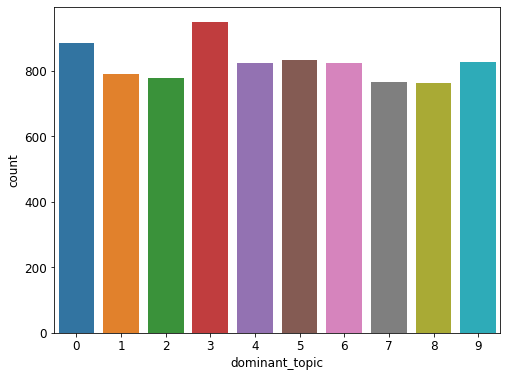

In [654]:
import seaborn as sns
sns.countplot(df_document_topic_term.dominant_topic)

**Gold Standard**

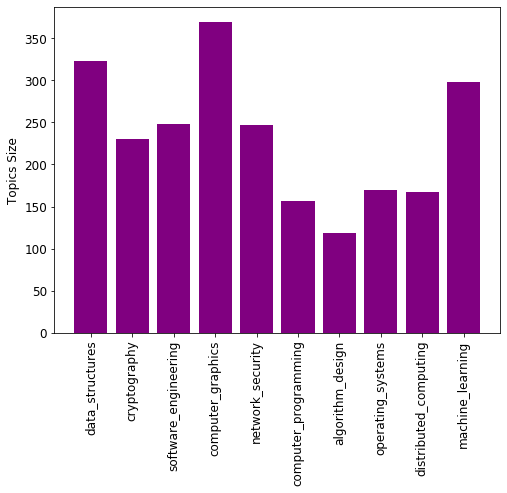

In [655]:
import matplotlib.pyplot as plt
gs=clean_corpus['gs']
gs.pop('o')
gs_termcounts=[]
core_concepts=[]
for core_concept in gs:
    core_concepts.append(core_concept)
    gs_termcounts.append(len(gs[core_concept]))
plt.bar(core_concepts,gs_termcounts,width=0.8,color='purple')
plt.xticks(rotation=90)
plt.ylabel("Topics Size")
plt.show()

In [656]:
label=labeled_corpus['label']
filtered_labels=[]
for i in range(len(vocab)):
    id,word=id2word[i]
    index=terms_list.index(word)
    filtered_labels.append(label[index])

**Clusters Formation**

In [657]:
clusters=[]
for i in range(10):
    cluster=[]
    for j in range(len(vocab)):
        row=df_document_topic_term.loc[j]
        if(row['dominant_topic']==i):
            cluster.append(row['terms'])
    clusters.append(cluster)

In [658]:
#each sample contains all the features (frequency,tf-idf and saliency) of terms in a cluster
measures=df_terms.drop(axis=1,columns='Terms')
samples=[]
clusters_labels=[]
for cluster in clusters:
    indexes=[]
    sample=[]
    cluster_labels=[]
    for term in cluster:
        indexes.append(word2id[term])
    for index in indexes:
        sample.append(measures.loc[index])
        cluster_labels.append(filtered_labels[index])
    samples.append(sample)
    clusters_labels.append(cluster_labels)

**Evaluation (With and Without Gold Standard)**

In [659]:
feature_matrix=model.topic_word_
feature_matrix=feature_matrix.transpose()

In [680]:
#calculating cosine similarity between terms feature vectors (feature vectors= topic-term probabilities)
from numpy import dot
from numpy.linalg import norm
import scipy.spatial.distance as distance
a=b=feature_matrix
cos_sim = dot(a, b.transpose())/(norm(a)*norm(b))
print(cos_sim)

[[3.54782026e-10 3.54782026e-10 3.54782026e-10 ... 4.89307187e-06
  5.52948603e-06 6.89649199e-06]
 [3.54782026e-10 3.54782026e-10 3.54782026e-10 ... 4.89307187e-06
  5.52948603e-06 6.89649199e-06]
 [3.54782026e-10 3.54782026e-10 3.54782026e-10 ... 4.89307187e-06
  5.52948603e-06 6.89649199e-06]
 ...
 [4.89307187e-06 4.89307187e-06 4.89307187e-06 ... 7.23216387e-02
  8.16994074e-02 9.93681782e-02]
 [5.52948603e-06 5.52948603e-06 5.52948603e-06 ... 8.16994074e-02
  9.31131646e-02 1.13994108e-01]
 [6.89649199e-06 6.89649199e-06 6.89649199e-06 ... 9.93681782e-02
  1.13994108e-01 1.42662727e-01]]


In [682]:
#computing silhouette of samples composed of features (freq,tf-idf,saliency)
y_pred_1=df_document_topic_term.dominant_topic.tolist()
from sklearn.metrics import silhouette_score
silhouette_1=silhouette_score(feature_matrix,y_pred_1)
print("The silhouette measure according to Euclidean distance: ",silhouette_1)
silhouette_2=silhouette_score(cos_sim,y_pred_1)
print("The silhouette measure according to cosine distance: ",silhouette_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


The silhouette measure according to Euclidean distance:  -0.1447874261956339


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


The silhouette measure according to cosine distance:  -0.14673264922279589


In [683]:
from sklearn.metrics import calinski_harabasz_score
#computing calinski of samples composed of features (freq,tf-idf,saliency)
calinski_harabasz_score_1=calinski_harabasz_score(feature_matrix,y_pred_1)
print("The calinski measure according to Euclidean distance: ",calinski_harabasz_score_1)
calinski_harabasz_score_2=calinski_harabasz_score(cos_sim,y_pred_1)
print("The calinski measure according to cosine distance: ",calinski_harabasz_score_2)

The calinski measure according to Euclidean distance:  96.29175821655721
The calinski measure according to cosine distance:  97.23580436035293


In [662]:
filtered_labels[4208]='o'
y_pred=df_document_topic_term['dominant_topic']

In [686]:
#Calculating Number of Irrelevant terms in Corpus
count=0
labels=labeled_corpus['label']
for label in labels:
    if(label=='o'):
        count=count+1
print(count)

5935


In [675]:
labels_gs=[]
dictionary_label={'operating_systems':0,'network_security':1,'machine_learning':2,'data_structures':3,'cryptography':4,'distributed_computing':5,'computer_programming':6,'software_engineering':7,'computer_graphics':8,'algorithm_design':9,'o':10}
for label in filtered_labels:
    labels_gs.append(dictionary_label[label])
df_document_topic_term['gs label'] =labels_gs
df_document_topic_term.head()
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(labels_gs,df_document_topic_term['dominant_topic'])
print(conf_matrix)

[[   3   14   10    7   10   11    8   17   12   14   64]
 [   6   28   19    9   11   11   16   19   19   22   86]
 [  10   24   19   20   20   34   26   28   27   20   69]
 [  13   24   20   13   28   36   26    8   25   20  105]
 [  10   13   16   10   15   22   17   11   12   16   88]
 [   6   11    6    7   19   12   14    2   18   12   59]
 [   7    8   13   12    9   11   11   21    6   11   48]
 [  32    8   18   13   10   20   18   15   14   14   86]
 [  22   26   25   31   32   20   20   30   33   27  102]
 [   7    7   12    9    8    3   10    7    9    6   40]
 [ 346  422  456  384  485  463  454  424  360  428 1695]]


In [664]:
from sklearn.metrics import f1_score, precision_recall_fscore_support
p_macro, r_macro, f_macro, support_macro \
    = precision_recall_fscore_support(y_true=labels_gs, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average='macro')

p_micro, r_micro, f_micro, support_micro\
    = precision_recall_fscore_support(y_true=labels_gs, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average='micro')

print('macro: p {}, r {}, f1 {}'.format(p_macro, r_macro, f_macro))

print('micro: p {}, r {}, f1 {}'.format(p_micro, r_micro, f_micro))


macro: p 0.025278747612840758, r 0.08642907848723903, f1 0.03834899639233295
micro: p 0.027565270188221008, r 0.027565270188221008, f1 0.027565270188221008


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [665]:
from sklearn.metrics import adjusted_rand_score
rand_score=adjusted_rand_score(labels_gs,df_document_topic_term['dominant_topic'])
print(rand_score)

0.00031561836653507815


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [666]:
print(model.alpha)

0.01


In [667]:
print(model.eta)

0.01


**Probabilities of Top 100 words**

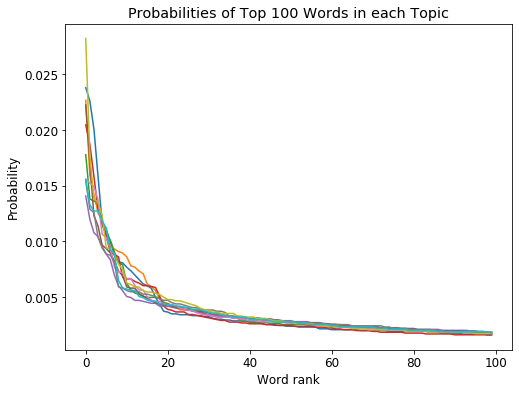

In [668]:
import matplotlib.pyplot as plt
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

# top 100 words by weight in each topic
top_n_words = 100
topics= model.topic_word_

for i, topic_dist in enumerate(topics):
    topic_dist.sort()
    topic_dist=topic_dist[:-(top_n_words+1):-1]
    probs = [prob for prob in topic_dist]
    plt.plot(range(top_n_words), probs)

plt.xlabel('Word rank')
plt.ylabel('Probability')
plt.title('Probabilities of Top 100 Words in each Topic')
plt.show()

**This part to be updated**

In [669]:
#computing pairwise precision
no_of_pairs=[]
for cluster in clusters:
    length=len(cluster)
    val=length*(length-1)/2
    no_of_pairs.append(val)
den=0
for value in no_of_pairs:
    den=den+value
num=0
for i in range(11):
    num=num+conf_matrix[i][i]
pairwise_precision=num/den
print(pairwise_precision)

6.673626445670654e-05
